<a href="https://colab.research.google.com/github/Katy-Kittivibul/Bank-Churn-prediction/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank customer churn prediction**

This project aims to gain insights into customer attrition and identify strategies to enhance customer retention by analysing customer churn. By leveraging model predictions and feature importance insights, banks can proactively address churn and enhance customer loyalty.




Dataset link: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

## About Dataset
- RowNumber: corresponds to the record (row) number and has no effect on the output.
- CustomerId: contains random values and has no effect on customer leaving the bank.
- Surname: the surname of a customer has no impact on their decision to leave the bank.
- CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography: a customer’s location can affect their decision to leave the bank.
- Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts: refers to the number of products that a customer has purchased through the bank.
- HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember:active customers are less likely to leave the bank.
- EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited: whether or not the customer left the bank.
- Complain: customer has complaint or not.
- Satisfaction Score: Score provided by the customer for their complaint resolution.
- Card Type: type of card hold by the customer.
- Points Earned: the points earned by the customer for using credit card.

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, r2_score, roc_curve, auc, roc_auc_score
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

## Import data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("radheshyamkollipara/bank-customer-churn")

print("Path to dataset files:", path)

100%|██████████| 307k/307k [00:00<00:00, 50.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/radheshyamkollipara/bank-customer-churn/versions/1


In [ ]:
# List files in the directory

files = os.listdir(path)
print("Files in the dataset folder:", files)

for file in files:
    if file.endswith(".csv"):
        dataset_path = os.path.join(path, file)
        print(f"Reading file: {dataset_path}")

        # Load the CSV file into a DataFrame
        data = pd.read_csv(dataset_path)

Files in the dataset folder: ['Customer-Churn-Records.csv']
Reading file: /root/.cache/kagglehub/datasets/radheshyamkollipara/bank-customer-churn/versions/1/Customer-Churn-Records.csv


## Data cleaning

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
# Check number of rows and column
data.shape

(10000, 18)

In [ ]:
# Check null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Check column names
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [ ]:
# Remove columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>,
        <Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'Satisfaction Score'}>,
        <Axes: title={'center': 'Point Earned'}>]], dtype=object)

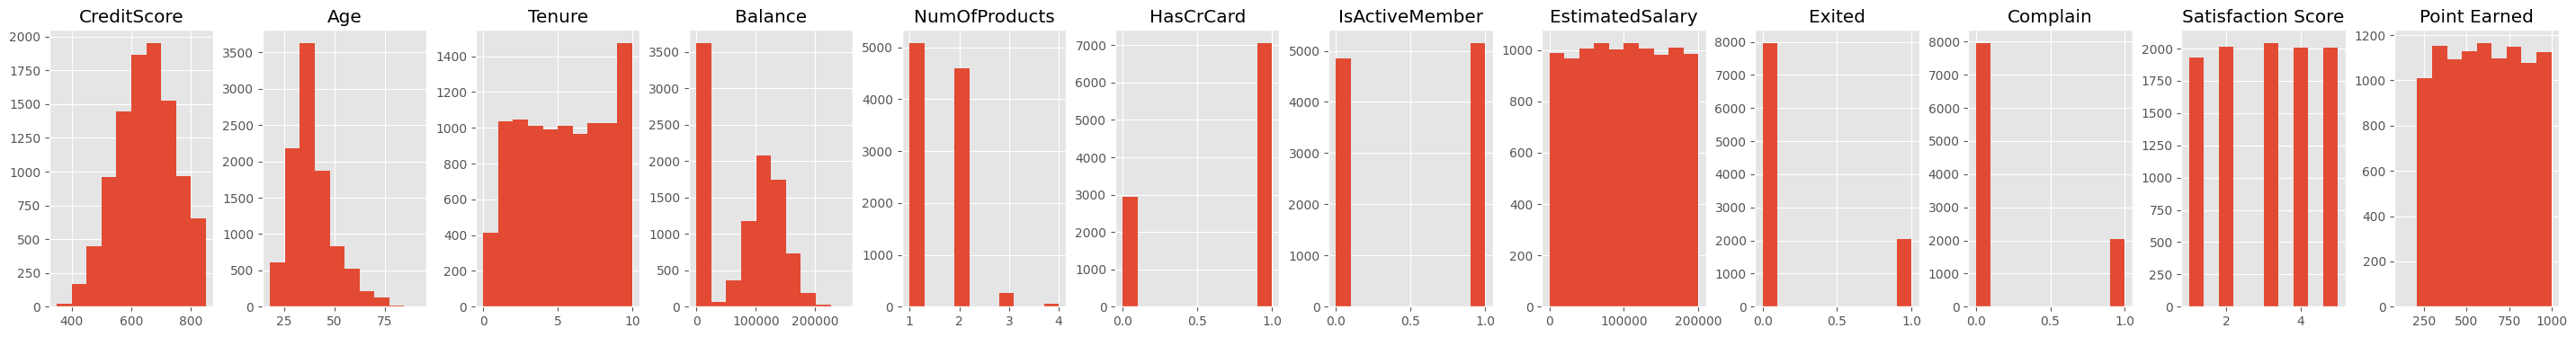

In [ ]:
# Check data distribution. According to the datasheet, all features have already been normalized in the range between 0 to 1.
columns = ['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned']
data[columns].hist(layout=(1, len(columns)), figsize=(3*len(columns), 4))

In [ ]:
# Statistical analysis
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


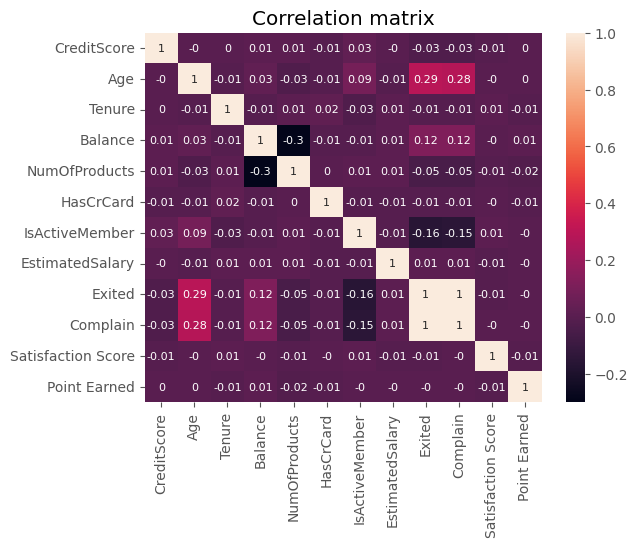

In [ ]:
# Correlation matrix
corr_matrix = data[columns].corr().round(2)
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":8})
plt.title('Correlation matrix')
plt.show()

## Data Visualisation

In [ ]:
# Count occurrences of each churn status
churn_counts = data['Exited'].value_counts().reset_index()
churn_counts.columns = ['Churn Status', 'Count']
churn_counts['Churn Status'] = churn_counts['Churn Status'].map({0: 'Retained', 1: 'Churned'})

# Create a pie chart
fig_1 = px.pie(
    churn_counts,
    names='Churn Status',
    values='Count',
    title='Churn Distribution',
    color='Churn Status',
    color_discrete_sequence=px.colors.sequential.RdBu,
    hole=0.4  # Creates a donut-style chart
)

fig_1.show()

In [ ]:
# Create a bar chart between churn rate and gender
fig_2 = px.histogram(data, x="Exited", color="Gender", title="Churn Rate by Gender", barmode='group',
                     color_discrete_sequence=["#6C8EB0", "#EDCF8E"])
fig_2.show()

In [ ]:
# Create a bar chart between churn rate and gender
fig_3 = px.histogram(data, x="Exited", color="Geography", title="Churn Rate Distribution by Country", barmode='group',
                     color_discrete_sequence=px.colors.qualitative.Pastel)
fig_3.show()

In [ ]:
fig_4 = px.box(data, x="Exited", y="Balance")
fig_4.show()

fig_5 = px.box(data, x="Exited", y="Tenure")
fig_5.show()

KeyboardInterrupt: 

## Data preprocessing

This section we will create classification using Logistic regression, Random forest, and XGBoost. However, Linear regression is a prediction model, we apply this model just to investigate and compare its resuts with other three classification model.

- **One-Hot Encoding**
One-Hot Encoding converts each category into a separate column with a binary indicator (0 or 1). This is preferred when the categorical data has no ordinal relationship (nominal/unordered data) e.g., "Male" vs "Female".


- **Label Encoding**
Label Encoding assigns a unique integer to each category. This is useful when the categorical data has an inherent order e.g., "Low", "Medium", "High".

In [ ]:
# One-hot encoding
categorical_columns = ['Geography', 'Gender', 'Card Type']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(data.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Complain  Satisfaction Score  \
0               1        101348.88       1         1                   2   
1               1        112542.58       0         1                   3   
2               0        113931.57       1         1                   3   
3               0         93826.63       0         0                   5   
4               1         79084.10       0         0                   5   

   Point Earned  Geography_Germany  Geography_Spain  Gender_Male  \
0           464              False            False        False  

In [ ]:
# Train and test splitting
X = data.drop('Exited', axis=1)
y = data['Exited']

In [ ]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [ ]:
# Data scaling: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Model Training and Evaluation

In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)
y_pred_lin_reg = np.round(y_pred_lin_reg)

In [ ]:
# Random Forest
rf = RandomForestClassifier(max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)


In [ ]:
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Calculate Evaluation Metrics

def evaluate_model(y_test, y_pred, model_name):
    if model_name == "Linear Regression":
        # Linear regression: R² and MSE
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        return round(r2, 3), round(mse, 3)
    else:
        # Classification models: Accuracy, Precision, Recall, F1 Score
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        return round(accuracy, 3), round(precision, 3), round(recall, 3), round(f1, 3)

metrics_lin_reg = evaluate_model(y_test, y_pred_lin_reg, "Linear Regression")
metrics_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")
metrics_log_reg = evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
metrics_xgb = evaluate_model(y_test, y_pred_xgb, "XGBoost")

In [ ]:
print("Linear Regression Metrics (R2, MSE):", metrics_lin_reg)
print("Random Forest Metrics (Accuracy, Precision, Recall, F1 Score):", metrics_rf)
print("Logistic Regression Metrics (Accuracy, Precision, Recall, F1 Score):", metrics_log_reg)
print("XGBoost Metrics (Accuracy, Precision, Recall, F1 Score):", metrics_xgb)

Linear Regression Metrics (R2, MSE): (0.991, 0.001)
Random Forest Metrics (Accuracy, Precision, Recall, F1 Score): (0.999, 0.995, 0.998, 0.997)
Logistic Regression Metrics (Accuracy, Precision, Recall, F1 Score): (0.999, 0.995, 0.998, 0.997)
XGBoost Metrics (Accuracy, Precision, Recall, F1 Score): (0.999, 0.995, 0.998, 0.997)


In [ ]:
# Plot ROC Curve for the classification models

# Calculate the predicted probabilities for the ROC curve
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'{model_name} (AUC = {roc_auc:.3f})'))
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line={'dash': 'dash'}))
    fig.update_layout(title=f'ROC Curve for {model_name}', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
    fig.show()

# Plot ROC curves for Logistic Regression, Random Forest, and XGBoost
plot_roc_curve(y_test, y_pred_prob_log_reg, 'Logistic Regression')
plot_roc_curve(y_test, y_pred_prob_rf, 'Random Forest')
plot_roc_curve(y_test, y_pred_prob_xgb, 'XGBoost')

## Feature importance

Random Forest models provide an easy way to calculate feature importance based on the mean decrease in impurity (Gini importance) or permutation importance.

In [ ]:
# Random Forest

# Get feature importance from Random Forest
feature_importance_rf = rf.feature_importances_

# Create a DataFrame to display the features and their importance
importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print(importance_rf.head(10))


              Feature  Importance
8            Complain    0.820614
1                 Age    0.070572
4       NumOfProducts    0.046965
6      IsActiveMember    0.012341
3             Balance    0.011950
11  Geography_Germany    0.008488
0         CreditScore    0.006294
10       Point Earned    0.006046
7     EstimatedSalary    0.006039
13        Gender_Male    0.002887


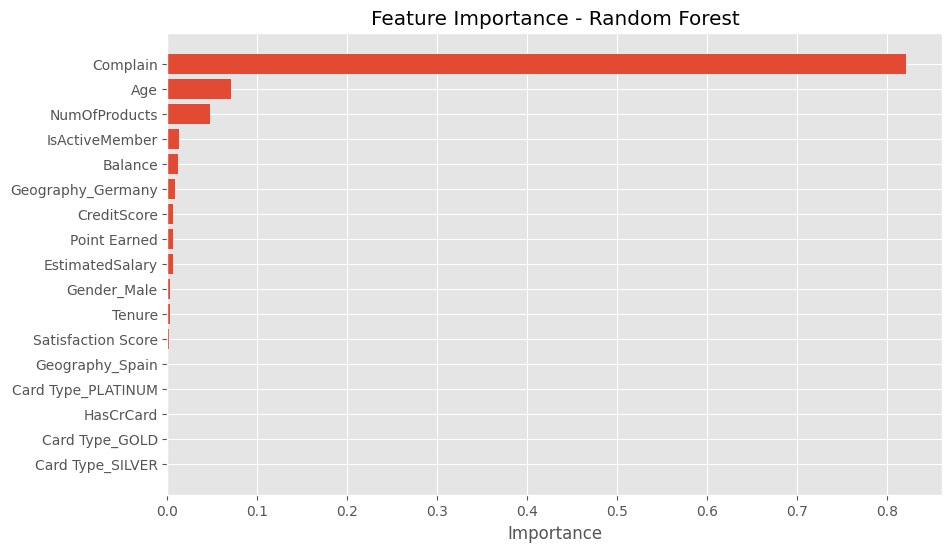

In [ ]:
# Plot a chart

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(importance_rf['Feature'], importance_rf['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()


Logistic Regression uses coefficients to determine the importance of features. The magnitude of the coefficients (whether positive or negative) indicates the importance of the features.

In [ ]:
# Logistic regression

# Get feature importance from Logistic Regression
importance_log_reg = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Display the top 10 important features
print(importance_log_reg.head(10))


             Feature  Coefficient
8           Complain     5.029430
1                Age     0.751854
3            Balance     0.193072
0        CreditScore     0.119692
16  Card Type_SILVER     0.115662
12   Geography_Spain     0.114187
14    Card Type_GOLD     0.052032
4      NumOfProducts    -0.053189
2             Tenure    -0.080619
5          HasCrCard    -0.085880


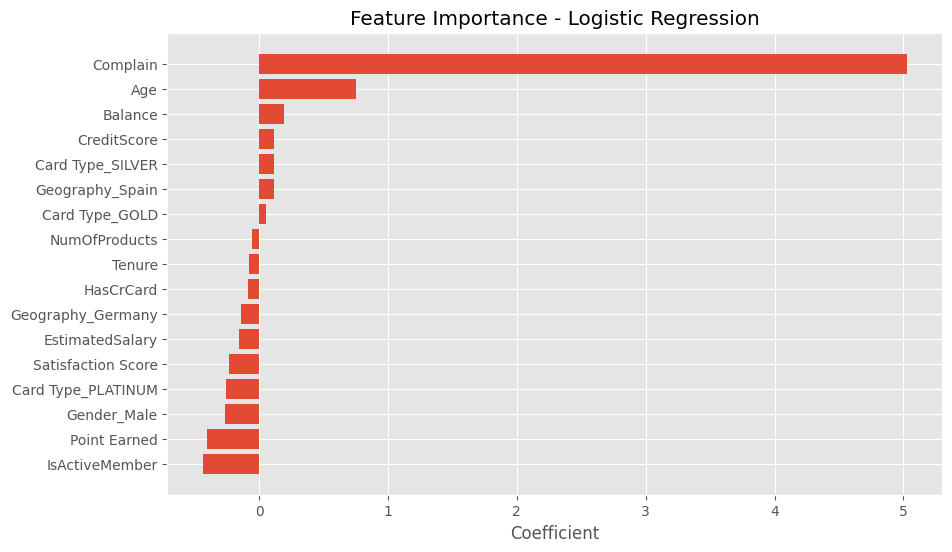

In [ ]:
# Plot a chart

plt.figure(figsize=(10, 6))
plt.barh(importance_log_reg['Feature'], importance_log_reg['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()


XGBoost has built-in methods to calculate feature importance, which can be based on weight, gain, or cover.

In [ ]:
# XGBoost

# Get feature importance from XGBoost
importance_xgb = xgb_model.get_booster().get_score(importance_type='weight')

# Convert to DataFrame and sort by importance
importance_xgb_df = pd.DataFrame({
    'Feature': list(importance_xgb.keys()),
    'Weight': list(importance_xgb.values())
}).sort_values(by='Weight', ascending=False)

# Ensure the feature names are aligned with the one-hot encoded names
importance_xgb_df['Feature'] = importance_xgb_df['Feature'].map(lambda x: X.columns[int(x[1:])] if x.startswith('f') else x)

# Display the top 10 important features
print(importance_xgb_df.head(10))


               Feature  Weight
9         Point Earned    77.0
3              Balance    73.0
6      EstimatedSalary    65.0
7             Complain    63.0
1                  Age    49.0
0          CreditScore    33.0
2               Tenure    23.0
8   Satisfaction Score    21.0
12         Gender_Male    15.0
4        NumOfProducts    14.0


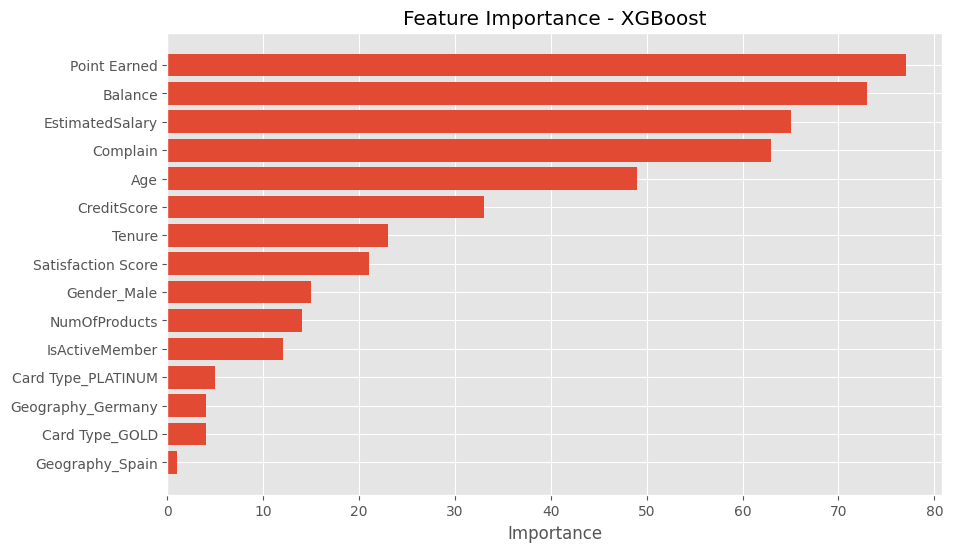

In [ ]:
# Pot a chart

plt.figure(figsize=(10, 6))
plt.barh(importance_xgb_df['Feature'], importance_xgb_df['Weight'])
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.show()
